# Additional Analysis


Data Import and Initial Checks <br>
Question 1 <br>
Question 2 <br>
Question 3 <br>
Question 4 <br>
Question 5 <br>

Project brief is available at : https://images.careerfoundry.com/public/courses/data-immersion/A4/A4_Data_Project%20Brief.pdf


## Data Imports and Checks

In [7]:
#Library Imports

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\n4\Desktop\EX4.10 - Excel Reporting'

In [3]:
df = pd.read_pickle(os.path.join(path,'02 Data','Prepared','cus_ords_over_5.pkl'))

In [4]:
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,fam_status,income,region,department,income_levels,age_group,avg_time_per_user,customers_median_daytime,kids_count,parental_status
0,431534,1,5,4,15,28.0,196,1,1,Soda,...,married,40423,South,beverages,low income,Young Adult,14.0,Mid-day Shopper,0.0,couple without kids
1,3367565,1,6,2,7,19.0,196,1,1,Soda,...,married,40423,South,beverages,low income,Young Adult,14.0,Mid-day Shopper,0.0,couple without kids
2,550135,1,7,1,9,20.0,196,1,1,Soda,...,married,40423,South,beverages,low income,Young Adult,14.0,Mid-day Shopper,0.0,couple without kids
3,3108588,1,8,1,14,14.0,196,2,1,Soda,...,married,40423,South,beverages,low income,Young Adult,14.0,Mid-day Shopper,0.0,couple without kids
4,2295261,1,9,1,16,0.0,196,4,1,Soda,...,married,40423,South,beverages,low income,Young Adult,14.0,Mid-day Shopper,0.0,couple without kids


In [5]:
df.shape

(24414877, 39)

In [6]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'avg_spend_per_user', 'high_spenders',
       'median_days_since_prior_ords', 'frequent_user', 'firstname', 'surname',
       'gender', 'state', 'age', 'date_joined', 'n_dependants', 'fam_status',
       'income', 'region', 'department', 'income_levels', 'age_group',
       'avg_time_per_user', 'customers_median_daytime', 'kids_count',
       'parental_status'],
      dtype='object')

## Question 1

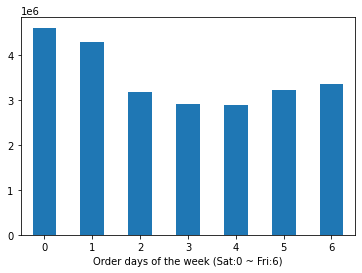

In [65]:
# Most orders during the week

q1 = df['order_dow'].value_counts().sort_index().plot.bar(rot = 0,
                                                    xlabel = 'Order days of the week (Sat:0 ~ Fri:6)')

In [66]:
q1.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Q1-days.png'))

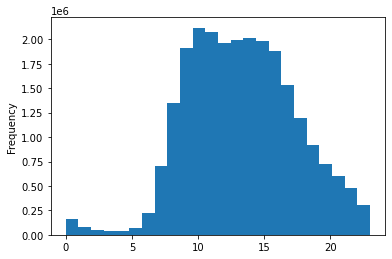

In [67]:
# Q2 - times of the day based on orders

q1_busy_time = df['order_hour_of_day'].plot.hist(bins = 24)


In [68]:
q1_busy_time.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'q1-hours.png'))

## Question 2

<AxesSubplot:xlabel='order_hour_of_day'>

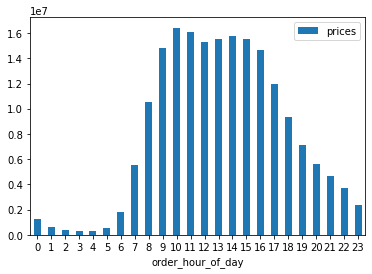

In [37]:
round(df.groupby('order_hour_of_day').agg({'prices':'sum'})).plot.bar(rot = 0)

<AxesSubplot:xlabel='order_hour_of_day'>

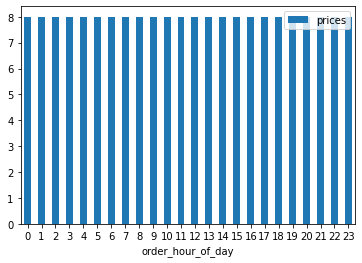

In [38]:
round(df.groupby('order_hour_of_day').agg({'prices':'mean'})).plot.bar(rot = 0)

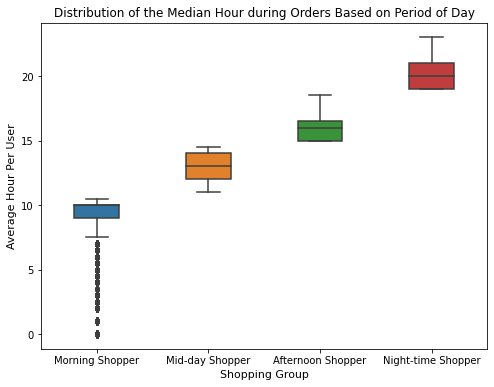

In [40]:
# Main times users shop. This will help stakeholders know eactly which tv shows to target.

plt.figure(figsize=(8, 6))
sns.boxplot(x = df['customers_median_daytime'], y = df['avg_time_per_user'], 
            order = ['Morning Shopper','Mid-day Shopper', 'Afternoon Shopper', 'Night-time Shopper'],
            width = 0.4)
plt.ylabel("Average Hour Per User", size=11)
plt.xlabel("Shopping Group", size=11)
plt.title("Distribution of the Median Hour during Orders Based on Period of Day", size=12)
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Q5-timeofday_group.png'))
    
plt.show()

## Question 3

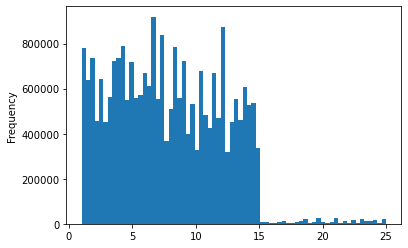

In [73]:
# Price ranges

fig_q1 = df['prices'].plot.hist(bins = 70, xlabel = 'Prices')

<AxesSubplot:xlabel='Product Price Range', ylabel='Frequency'>

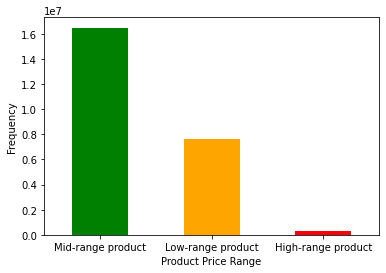

In [87]:
df['price_range_loc'].value_counts().plot.bar( xlabel = "Product Price Range", ylabel = 'Frequency', rot = 0,
                                             color = ['green','orange','red'])

## Question 4

<AxesSubplot:xlabel='department', ylabel='Number of Orders'>

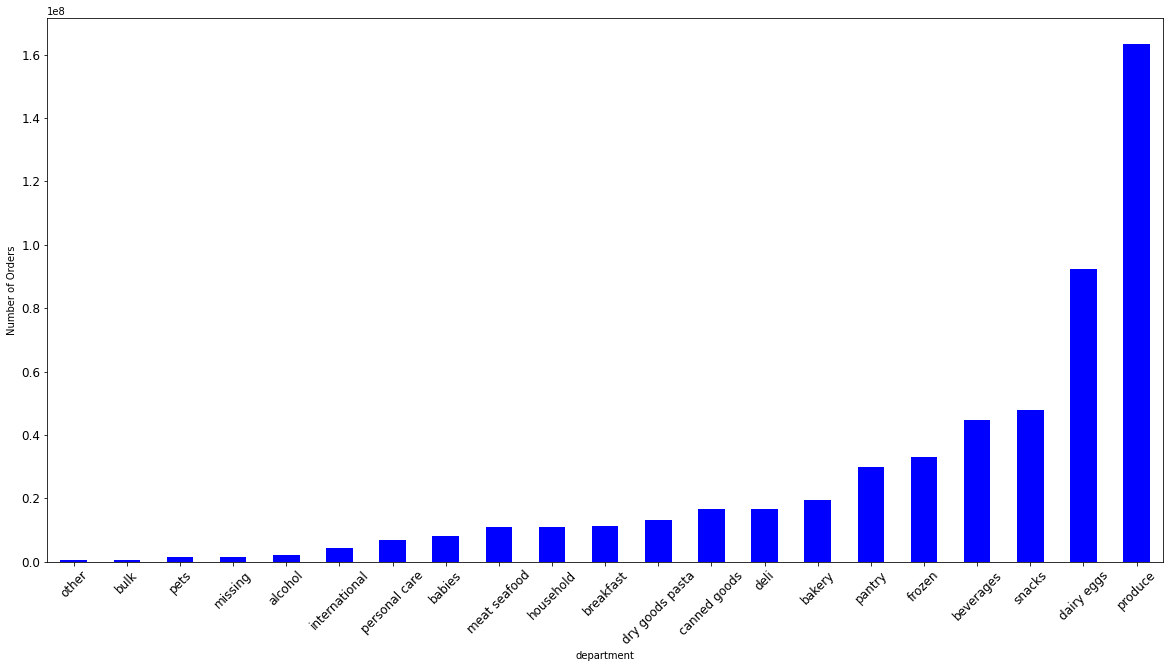

In [94]:
# Q4 - certain types of products based on total sales
#group department id, agg by mean of order num
df.groupby('department')['order_number'].sum().sort_values().plot.bar(ylabel = 'Number of Orders',
                                                                      rot=45,
                                                                      figsize = (20,10),
                                                                     color = "blue",
                                                                     fontsize = 12)

<AxesSubplot:xlabel='department', ylabel='Number of Orders'>

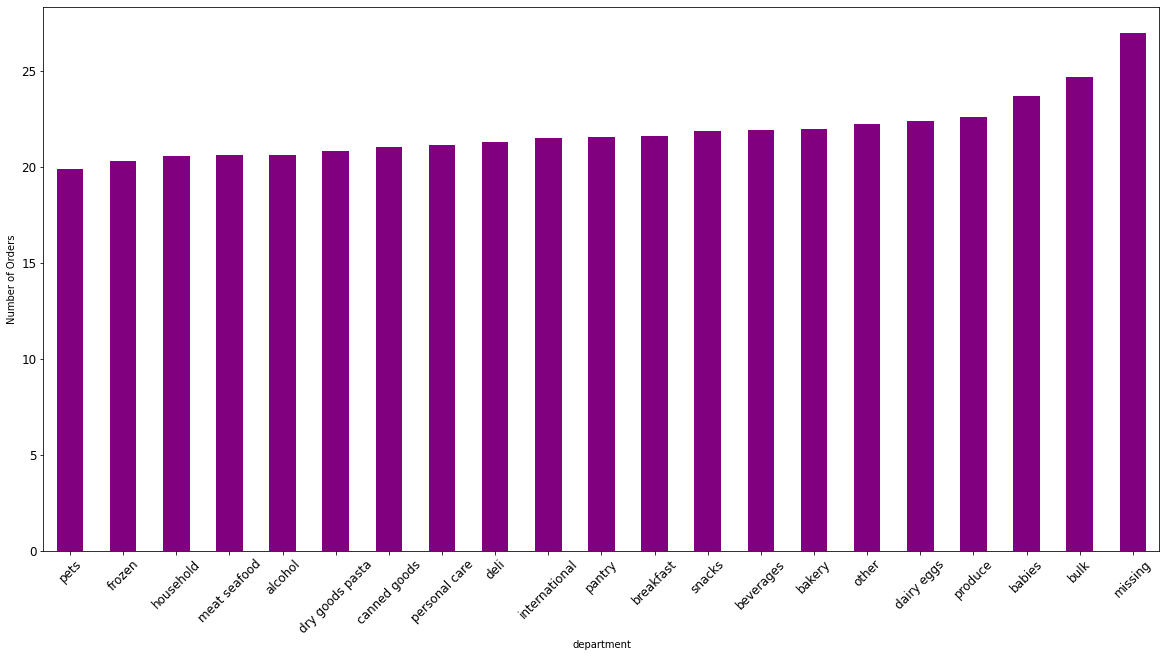

In [116]:
# Q4 - types of products based on median orders
#group department id, agg by mean of order num

df.groupby('department')['order_number'].mean().sort_values().plot.bar(ylabel = 'Number of Orders',
                                                                       rot=45,
                                                                       figsize = (20,10),
                                                                       color = "purple",
                                                                       fontsize = 12)

## Question 5

In [64]:
df.groupby(['loyalty_flag']).agg({'prices': ['mean','median','max','min']})

# The spread are the customer groups seem similar. Regular and new customers seem to also purchase expexsive products.

prices                  
                      mean median   max  min
loyalty_flag                                
Loyal customer    7.774434    7.4  25.0  1.0
New customer      7.802461    7.4  25.0  1.0
Regular customer  7.800892    7.4  25.0  1.0

In [114]:
round(df.groupby(['loyalty_flag','frequent_user'])
              .agg({'order_number':['max','min','mean','median'],
                    'prices':['sum','max','min','mean','median']})
             )

order_number                   \
                                                max min  mean median   
loyalty_flag     frequent_user                                         
Loyal customer   Frequent customer               99   5  35.0     33   
                 Regular customer                45   5  25.0     25   
New customer     Frequent customer               10   5   7.0      6   
                 Non-frequent customer           10   5   6.0      6   
                 Regular customer                10   5   7.0      6   
Regular customer Frequent customer               40   5  16.0     15   
                 Non-frequent customer           25   5   9.0      9   
                 Regular customer                40   5  12.0     11   

                                            prices                         
                                               sum   max  min mean median  
loyalty_flag     frequent_user                                             
Loyal customer   Frequent customer      74262244.0  25.0  1.0  8.0    7.0  
                 Regular customer          16639.0  25.0  1.0  7.0    7.0  
New customer     Frequent customer       5613533.0  25.0  1.0  8.0    7.0  
                 Non-frequent customer   5116231.0  25.0  1.0  8.0    7.0  
                 Regular customer        5768104.0  25.0  1.0  8.0    7.0  
Regular customer Frequent customer      66317686.0  25.0  1.0  8.0    7.0  
                 Non-frequent customer   3517191.0  25.0  1.0  8.0    7.0  
                 Regular customer       29567770.0  25.0  1.0  8.0    7.0

<AxesSubplot:xlabel='loyalty_flag', ylabel='Number of Customers'>

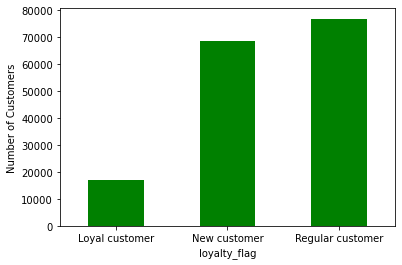

In [111]:
# Unique custermers in loyalty group

df.groupby(['loyalty_flag']).agg({'user_id':['nunique']}).plot.bar(color = ['green','orange','purple'],
                                                                   rot = 0, legend = False, ylabel = 'Number of Customers',)

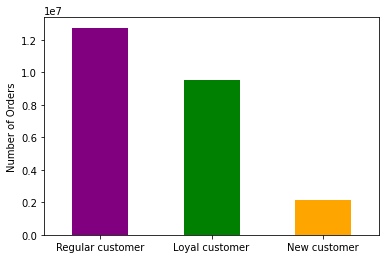

In [112]:
#Q5 
# plt.figure(figsize = (10,5)) # sets the dimensions - x axis * y axis
q5_loyalty_price_bar = df['loyalty_flag'].value_counts().plot.bar(color = ['purple','green','orange'], rot = 0,
                                                                 ylabel = 'Number of Orders')

<AxesSubplot:xlabel='region,loyalty_flag'>

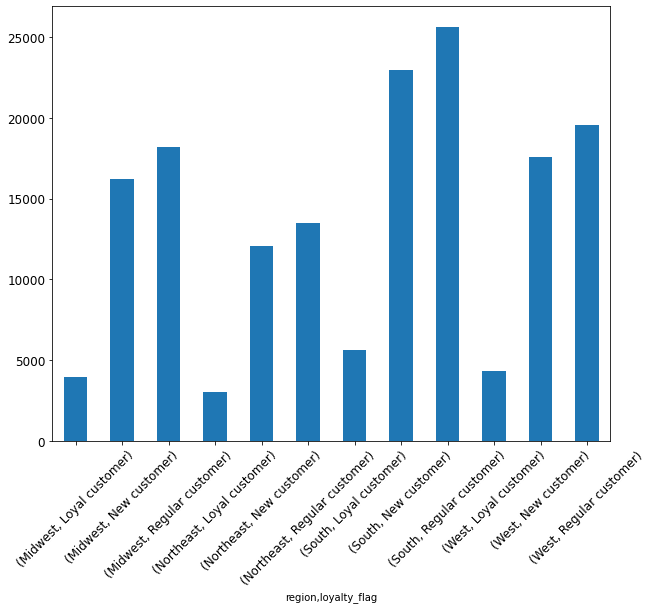

In [105]:
round(df.groupby(['region','loyalty_flag'])
              .agg({'user_id':['nunique']})).plot.bar(rot = 45, figsize = (10,8), legend = False, fontsize = 12)
            

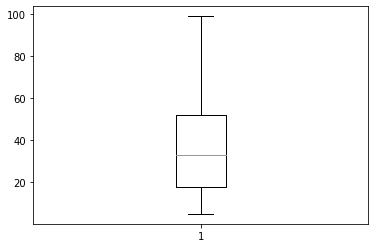

In [58]:
# Q5 - additional differences
# Addtional - max orders based on region and loyalty and spending and parental status

plt.boxplot(df['max_order'])
plt.show() 

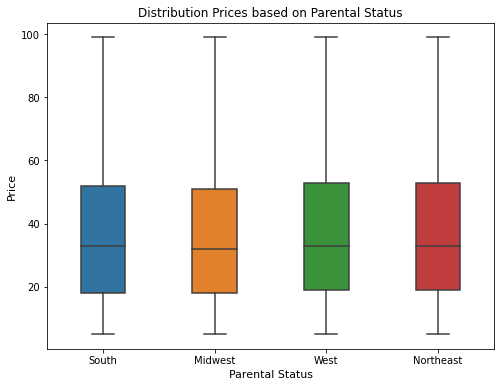

In [55]:
# The above figure represents a subset of the user population.

plt.figure(figsize=(8, 6))
sns.boxplot(x = df['region'], y = df['max_order'],
            width = 0.4)
plt.ylabel("Max Orders", size=11)
plt.xlabel("Parental Status", size=11)
plt.title("Distribution Max Orders based on Region", size=12)
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'customer_time_of_day_group.png'))
    
plt.show()

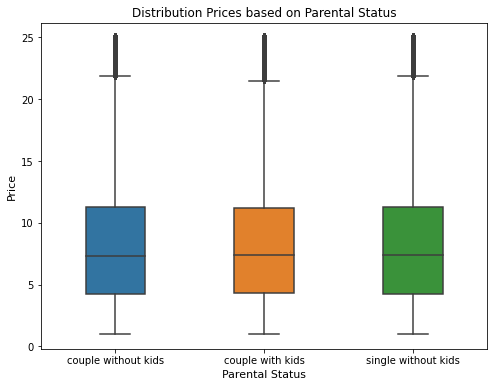

In [43]:
# The above figure represents a subset of the user population.

plt.figure(figsize=(8, 6))
sns.boxplot(x = df['parental_status'], y = df['prices'], 
            order = ['couple without kids','couple with kids', 'single without kids'],
            width = 0.4)
plt.ylabel("Price", size=11)
plt.xlabel("Parental Status", size=11)
plt.title("Distribution Prices based on Parental Status", size=12)
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'customer_time_of_day_group.png'))
    
plt.show()

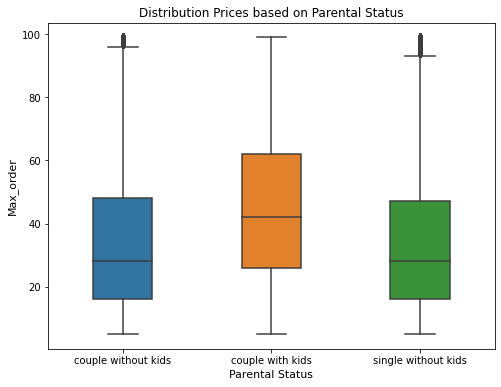

In [53]:
# The above figure represents a subset of the user population.

plt.figure(figsize=(8, 6))
sns.boxplot(x = df['parental_status'], y = df['max_order'], 
            order = ['couple without kids','couple with kids', 'single without kids'],
            width = 0.4)
plt.ylabel("Max_order", size=11)
plt.xlabel("Parental Status", size=11)
plt.title("Distribution Max Orders based on Parental Status", size=12)
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'customer_time_of_day_group.png'))
    
plt.show()